<font color='darkorange'>**This week, the output of cells under "Exercise Output" must be visible.**</font>

---

# Exercise

For these exercises, add your functions to the *apputil\.py* file. If you like, you're welcome to adjust the *app\.py* file, but it is not required.

## Exercise 1

Use Scikit-Learn and NumPy to write a function `kmeans(X, k)` that does the following:

- performs k-means clustering on a numerical NumPy array `X`
- returns a **tuple** `(centroids, labels)`, where
    - `centroids` is a 2D array of shape `(k, n_features)` containing the cluster centroids, and 
    - `labels` is a 1D array of shape `(n_samples,)` containing the index of the assigned cluster for each row of `X`.

In [ ]:
import numpy as np
from sklearn.cluster import KMeans


def kmeans(X, k):
    """
    Create a KMeans clustering model using scikit-learn
    """
    model = KMeans(n_clusters=k, random_state=42)
    # Fit the model
    model.fit(X)
    # Extract centroids and labels
    centroids = model.cluster_centers_
    labels = model.labels_
    # Return as a tuple
    return centroids, labels

# Example
X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

centroids, labels = kmeans(X, k=3)

# Print Results
print("Centroids:\n", centroids)
print("Labels:", labels)
print("Centroid for 2nd cluster:", centroids[1])
print("Cluster assignment for 3rd data point:", labels[2])

Centroids:
 [[4. 5. 6.]
 [7. 8. 9.]
 [1. 2. 3.]]
Labels: [2 0 1]
Centroid for 2nd cluster: [7. 8. 9.]
Cluster assignment for 3rd data point: 1


## Exercise 2

1. Somewhere in your *apputil\.py* file, [load](https://seaborn.pydata.org/generated/seaborn.load_dataset.html) the `diamonds` dataset from the `seaborn` library.
2. Identify **just the numerical columns**, and save these (seven) columns in a dataframe as a global variable.
3. Write a function called `kmeans_diamonds(n, k)` that runs your `kmeans` function (from Exercise 1) to create `k` clusters on the first `n` rows of the (numeric) diamonds dataset.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')
numeric_diamonds = diamonds.select_dtypes(include=[np.number])

# kmeans function from Exercise 1
def kmeans(X, k):
    """
    Create a KMeans clustering model using scikit-learn
    """
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    centroids = model.cluster_centers_
    labels = model.labels_
    return centroids, labels

# Define the kmeans_diamonds function
def kmeans_diamonds(n, k):
    """
    Runs k-means clustering on the diamonds data.
    """
    # Select the first n rows of numeric columns
    X = numeric_diamonds.head(n).to_numpy()
    
    # kmeans function from Exercise 1
    centroids, labels = kmeans(X, k)
    
    return centroids, labels


# Example
centroids, labels = kmeans_diamonds(n=1000, k=5)

# Print Results
print("Centroids:\n", centroids)
print("Labels:", labels[:15])
print("Centroid for 4th cluster:", centroids[3])
print("Cluster assignment for 10th diamond:", labels[9])

Centroids:
 [[7.48956916e-01 6.17079365e+01 5.78460317e+01 2.79698186e+03
  5.81895692e+00 5.81058957e+00 3.58750567e+00]
 [3.08444444e-01 6.19133333e+01 5.69766667e+01 5.54922222e+02
  4.33500000e+00 4.34233333e+00 2.68533333e+00]
 [2.61666667e-01 6.16633333e+01 5.79666667e+01 3.44333333e+02
  4.09466667e+00 4.11200000e+00 2.53000000e+00]
 [7.70586797e-01 6.17163814e+01 5.77694377e+01 2.86234474e+03
  5.87168704e+00 5.85951100e+00 3.62000000e+00]
 [2.73666667e-01 6.15166667e+01 5.76666667e+01 4.03300000e+02
  4.17566667e+00 4.20000000e+00 2.57600000e+00]]
Labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Centroid for 4th cluster: [7.70586797e-01 6.17163814e+01 5.77694377e+01 2.86234474e+03
 5.87168704e+00 5.85951100e+00 3.62000000e+00]
Cluster assignment for 10th diamond: 2


## Exercise 3

Write a function called `kmeans_timer(n, k, n_iter=5)` that does the following:

- runs the function `kmeans_diamonds(n, k)` exactly `n_iter` times, and saves the runtime for each run.
- returns the *average* time across the `n` runs, where "time" is in seconds.

As a starting point, consider the following snippet:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from time import time

# --- From Exercise 2 ---
diamonds = sns.load_dataset('diamonds')
numeric_diamonds = diamonds.select_dtypes(include=[np.number])

def kmeans(X, k):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    return model.cluster_centers_, model.labels_

def kmeans_diamonds(n, k):
    X = numeric_diamonds.head(n).to_numpy()
    centroids, labels = kmeans(X, k)
    return centroids, labels

# --- Exercise 3 ---
def kmeans_timer(n, k, n_iter=5):
    """
    Runs kmeans_diamonds(n, k) exactly n_iter times,
    records the runtime for each run, and returns the average time in seconds.
    """
    times = []

    for i in range(n_iter):
        start = time()
        _ = kmeans_diamonds(n, k)
        runtime = time() - start
        times.append(runtime)
        print(f"Run {i+1}/{n_iter}: {runtime:.4f} seconds")

    avg_time = np.mean(times)
    return avg_time

# Example
avg_runtime = kmeans_timer(n=1000, k=5, n_iter=5)
print(f"\nAverage runtime over 5 iterations: {avg_runtime:.4f} seconds")

Run 1/5: 0.0031 seconds
Run 2/5: 0.0030 seconds
Run 3/5: 0.0036 seconds
Run 4/5: 0.0091 seconds
Run 5/5: 0.0063 seconds

Average runtime over 5 iterations: 0.0050 seconds


## Exercise Output

<font color='darkorange'>The output of the following cells must be visible.</font>

Run the following cells, and consider the time complexity for k-Means clustering with respect to the number of samples `n` and the number of clusters `k`.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

from apputil import *

%config InlineBackend.figure_formats = ['svg']
sns.set_theme(style="whitegrid")

In [5]:
# this might take a minute or so ...
n_values = np.arange(100, 50000, 1000)
k5_times = [kmeans_timer(n, 5, 20) for n in n_values]

Run 1/20: 0.0048 seconds
Run 2/20: 0.0029 seconds
Run 3/20: 0.0023 seconds
Run 4/20: 0.0022 seconds
Run 5/20: 0.0013 seconds
Run 6/20: 0.0014 seconds
Run 7/20: 0.0017 seconds
Run 8/20: 0.0020 seconds
Run 9/20: 0.0013 seconds
Run 10/20: 0.0013 seconds
Run 11/20: 0.0013 seconds
Run 12/20: 0.0013 seconds
Run 13/20: 0.0013 seconds
Run 14/20: 0.0013 seconds
Run 15/20: 0.0013 seconds
Run 16/20: 0.0013 seconds
Run 17/20: 0.0013 seconds
Run 18/20: 0.0014 seconds
Run 19/20: 0.0014 seconds
Run 20/20: 0.0013 seconds
Run 1/20: 0.0017 seconds
Run 2/20: 0.0016 seconds
Run 3/20: 0.0016 seconds
Run 4/20: 0.0016 seconds
Run 5/20: 0.0016 seconds
Run 6/20: 0.0016 seconds
Run 7/20: 0.0018 seconds
Run 8/20: 0.0019 seconds
Run 9/20: 0.0023 seconds
Run 10/20: 0.0016 seconds
Run 11/20: 0.0016 seconds
Run 12/20: 0.0016 seconds
Run 13/20: 0.0016 seconds
Run 14/20: 0.0018 seconds
Run 15/20: 0.0024 seconds
Run 16/20: 0.0025 seconds
Run 17/20: 0.0024 seconds
Run 18/20: 0.0026 seconds
Run 19/20: 0.0024 seconds
Run 

In [6]:
# this should be slightly faster
k_values = np.arange(2, 50)
n10k_times = [kmeans_timer(10000, k, 10) for k in k_values]

Run 1/10: 0.0078 seconds
Run 2/10: 0.0048 seconds
Run 3/10: 0.0034 seconds
Run 4/10: 0.0042 seconds
Run 5/10: 0.0035 seconds
Run 6/10: 0.0034 seconds
Run 7/10: 0.0033 seconds
Run 8/10: 0.0033 seconds
Run 9/10: 0.0034 seconds
Run 10/10: 0.0033 seconds
Run 1/10: 0.0047 seconds
Run 2/10: 0.0047 seconds
Run 3/10: 0.0070 seconds
Run 4/10: 0.0062 seconds
Run 5/10: 0.0050 seconds
Run 6/10: 0.0049 seconds
Run 7/10: 0.0048 seconds
Run 8/10: 0.0048 seconds
Run 9/10: 0.0048 seconds
Run 10/10: 0.0055 seconds
Run 1/10: 0.0128 seconds
Run 2/10: 0.0064 seconds
Run 3/10: 0.0055 seconds
Run 4/10: 0.0054 seconds
Run 5/10: 0.0053 seconds
Run 6/10: 0.0053 seconds
Run 7/10: 0.0053 seconds
Run 8/10: 0.0053 seconds
Run 9/10: 0.0064 seconds
Run 10/10: 0.0067 seconds
Run 1/10: 0.0081 seconds
Run 2/10: 0.0076 seconds
Run 3/10: 0.0114 seconds
Run 4/10: 0.0090 seconds
Run 5/10: 0.0096 seconds
Run 6/10: 0.0100 seconds
Run 7/10: 0.0093 seconds
Run 8/10: 0.0085 seconds
Run 9/10: 0.0075 seconds
Run 10/10: 0.0074 seco

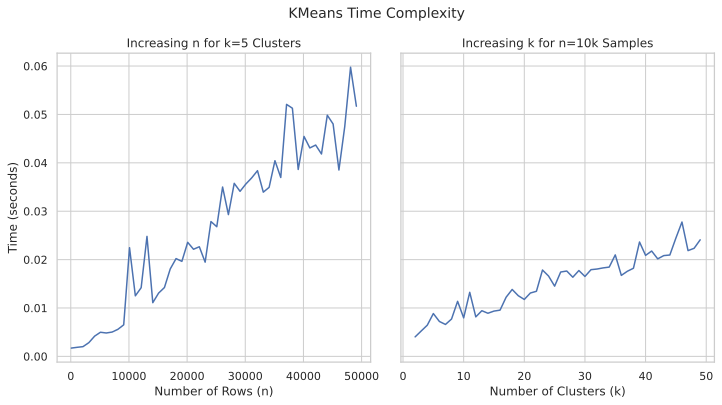

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
fig.tight_layout()
fig.suptitle("KMeans Time Complexity", y=1.08, fontsize=14)

sns.lineplot(x=n_values, y=k5_times, ax=axes[0])
axes[0].set_xlabel("Number of Rows (n)")
axes[0].set_ylabel("Time (seconds)")
axes[0].set_title('Increasing n for k=5 Clusters')

sns.lineplot(x=k_values, y=n10k_times, ax=axes[1])
axes[1].set_xlabel("Number of Clusters (k)")
axes[1].set_title('Increasing k for n=10k Samples');

## Bonus

Consider the following algorithm.

- Modify the code to *count* the number of computational steps taken, saved in a global variable `step_count`.
- Illustrate how this metric changes as $n\to\infty$ (consider the "worst case scenario").
- Estimate the time complexity of this algorithm using $O$-notation, and show it in a plot.
    - Refer to Chapter 11 in the Guttag book for more on asymptotic $O$-notation.

*Note: in this exercise, we are counting *steps*, not time.*

In [ ]:
def bin_search(n):
    arr = np.arange(n)
    left = 0
    right = n-1

    x = n-1

    while left <= right:
        middle = left + (right - left) // 2

        # check if x is present at mid
        if (arr[middle] == x):
            return middle

        # if x greater, ignore left half
        if (arr[middle] < x):
            left = middle + 1

        # if x is smaller, ignore right half
        else:
            right = middle - 1

    # if we reach here, then element was not present
    return -1